In [1]:
import pandas as pd 
import numpy as np 

In [2]:
def get_first_240_rows(group):
    if group.isna().any().any() != True:
        return group.head(240)


def preprocess_df(filter_data):
    filter_data = filter_data[['device','filetimeutc','speed','heading','yawrate','longaccel','steerangle']]
    result = filter_data.groupby(['device', 'filetimeutc']).apply(get_first_240_rows).reset_index(drop=True)
    res = result.groupby(['device', 'filetimeutc']).apply(np.array)
    l = res.index.to_list()
    ll = []
    for i in l:
        if (res.loc[i[0], i[1]]).shape == (240,7):
            ll.append(  {'key': i[0]   ,'data':res.loc[i[0], i[1]]})
        
    req_data =  pd.DataFrame(ll)
    return req_data
df = pd.read_csv(r'.\3-month-V2X\3-month-V2X\jan-22\host_jan-22.csv')
filter_data = preprocess_df(df)
filter_data


,key,data
0,68,"[[68.0, 1319.0, 0.32734722, 138.79, 0.0, -0.45..."
1,68,"[[68.0, 3408.0, 0.0, 0.0, 0.0, 0.0, 0.0], [68...."
2,68,"[[68.0, 13717.0, 0.7410278, 122.5, 0.0, 1.2866..."
3,68,"[[68.0, 13922.0, 2.8166249, 97.83, 10.505758, ..."
4,68,"[[68.0, 134711.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6..."
...,...,...
1893,10518,"[[10518.0, 4448.0, 2.147, 11.36052, -903.5817,..."
1894,10518,"[[10518.0, 173755.0, 0.23, 250.34087, 0.0, 0.0..."
1895,10518,"[[10518.0, 192537.0, 0.662, 250.34087, 0.0, -0..."
1896,10518,"[[10518.0, 202849.0, 0.0, 31.23654, 0.0, 0.0, ..."


In [3]:
df = pd.read_csv(r'.\3-month-V2X\3-month-V2X\feb-22\host_2-22.csv')
filter_data = pd.concat([filter_data,preprocess_df(df)],ignore_index=True)
filter_data

,key,data
0,68,"[[68.0, 1319.0, 0.32734722, 138.79, 0.0, -0.45..."
1,68,"[[68.0, 3408.0, 0.0, 0.0, 0.0, 0.0, 0.0], [68...."
2,68,"[[68.0, 13717.0, 0.7410278, 122.5, 0.0, 1.2866..."
3,68,"[[68.0, 13922.0, 2.8166249, 97.83, 10.505758, ..."
4,68,"[[68.0, 134711.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6..."
...,...,...
3887,10518,"[[10518.0, 222310.0, 0.0, 267.8545, 0.0, 0.0, ..."
3888,10518,"[[10518.0, 225002.0, 5.074, 176.9822, 22.81022..."
3889,10518,"[[10518.0, 232430.0, 2.384, 90.04182, -515.994..."
3890,10518,"[[10518.0, 235108.0, 2.136, 93.27462, 333.2315..."


In [4]:
df = pd.read_csv(r'.\3-month-V2X\3-month-V2X\mar-22\host_3-22.csv')
filter_data = pd.concat([filter_data,preprocess_df(df)],ignore_index=True)
filter_data

,key,data
0,68,"[[68.0, 1319.0, 0.32734722, 138.79, 0.0, -0.45..."
1,68,"[[68.0, 3408.0, 0.0, 0.0, 0.0, 0.0, 0.0], [68...."
2,68,"[[68.0, 13717.0, 0.7410278, 122.5, 0.0, 1.2866..."
3,68,"[[68.0, 13922.0, 2.8166249, 97.83, 10.505758, ..."
4,68,"[[68.0, 134711.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6..."
...,...,...
5871,10518,"[[10518.0, 225719.0, 4.975, 241.62321, -965.84..."
5872,10518,"[[10518.0, 230315.0, 0.607, 42.13857, 0.0, -0...."
5873,10518,"[[10518.0, 232431.0, 0.402, 179.02242, 0.0, 0...."
5874,10518,"[[10518.0, 232441.0, 0.0, 83.07932, 0.0, 0.0, ..."


In [5]:
req_data = filter_data

First 2 columns are device id and filetimeutc therefore, removed

In [6]:
req_data['data'] = req_data['data'].apply(lambda x: x[:,2:])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(req_data['data'][0])

req_data['data'] = req_data['data'].apply(lambda x: scaler.transform(x))
req_data

,key,data
0,68,"[[0.0, 0.041751636792959124, 0.866764146489268..."
1,68,"[[-0.01530698078909854, -0.703069657615112, 0...."
2,68,"[[0.019343987985855328, -0.045669206826231545,..."
3,68,"[[0.11640033364722566, -0.17806160781367386, 0..."
4,68,"[[-0.01530698078909854, -0.703069657615112, 0...."
...,...,...
5871,10518,"[[0.21732743543036787, 0.5936095846302457, -3...."
5872,10518,"[[0.013076756024010225, -0.47693157668777486, ..."
5873,10518,"[[0.0034908152551678933, 0.2576602983793067, 0..."
5874,10518,"[[-0.01530698078909854, -0.2572216378662659, 0..."


In [8]:
list_device_ids = req_data['key'].value_counts().head(5).keys().tolist()
list_device_ids

[10419, 10064, 10032, 10422, 10049]

In [9]:

req_data = req_data[req_data['key'].isin(list_device_ids)]

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

req_data['classes'] = le.fit_transform(req_data['key'])

C:\Users\shouv\AppData\Local\Temp\ipykernel_7472\2230101645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['classes'] = le.fit_transform(req_data['key'])


In [11]:
req_data['key']

413     10032
414     10032
415     10032
416     10032
417     10032
        ...  
5622    10422
5623    10422
5624    10422
5625    10422
5626    10422
Name: key, Length: 1558, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(req_data['data'], req_data['classes'], test_size=0.33, random_state=42)

In [13]:
x_train = []
for i in X_train:
    x_train.append(i)
x_train = np.array(x_train)


x_test = []
for i in X_test:
    x_test.append(i)
x_test = np.array(x_test)

In [14]:
x_train.shape

(1043, 240, 5)

In [15]:
# https://www.youtube.com/watch?v=lmk_EYG0vDI

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Conv1D, RepeatVector, Flatten, MaxPooling1D

window_size = 240
num_features = 5
num_classes = len(np.unique(y_train))


# model = Sequential([
#     LSTM(64, input_shape=(window_size, num_features)),
#     Dense(64, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

model = Sequential([
    Conv1D(64, kernel_size=num_features, activation='relu', input_shape=(window_size, num_features)),
    MaxPooling1D(5),
    Flatten(),
    RepeatVector(5),
    LSTM(64,activation='relu',return_sequences=True),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30


c:\Users\shouv\anaconda3\envs\pythonProject1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2580 - loss: 1.5963 - val_accuracy: 0.3254 - val_loss: 1.4944
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3184 - loss: 1.5136 - val_accuracy: 0.3589 - val_loss: 1.4576
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3729 - loss: 1.4331 - val_accuracy: 0.3589 - val_loss: 1.4895
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4419 - loss: 1.3636 - val_accuracy: 0.4019 - val_loss: 1.4005
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5075 - loss: 1.2302 - val_accuracy: 0.4163 - val_loss: 1.4067
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5344 - loss: 1.1670 - val_accuracy: 0.4450 - val_loss: 1.3860
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5924 - loss: 1.0239 - val_accuracy: 0.4833 - val_loss: 1.4646
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6013 - loss: 0.9732 - val_accuracy: 0.4019 - val_loss: 1.4228
Ep

In [16]:
model.evaluate(x_test, y_test)

 1/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4688 - loss: 6.3222

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4439 - loss: 4.1052 


[3.797607898712158, 0.43300971388816833]

In [17]:
y_pred = np.argmax(model.predict(x_test),axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step



The confusion matrix is:


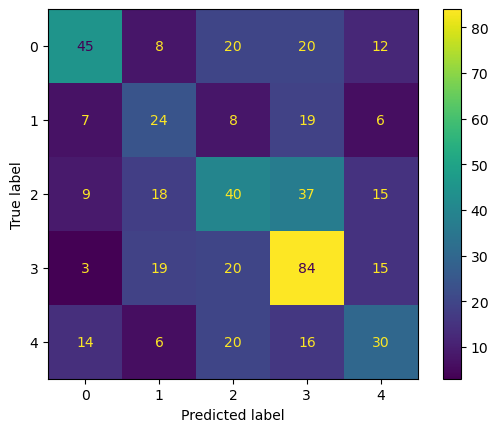

In [18]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)  
disp.plot()
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.43      0.49       105
           1       0.32      0.38      0.35        64
           2       0.37      0.34      0.35       119
           3       0.48      0.60      0.53       141
           4       0.38      0.35      0.37        86

    accuracy                           0.43       515
   macro avg       0.43      0.42      0.42       515
weighted avg       0.44      0.43      0.43       515



In [20]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 236, 64)        │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 5, 3008)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 5, 64)          │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         1,605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369,873 (9.04 MB)

 Trainable params: 789,957 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,579,916 (6.03 MB)

None


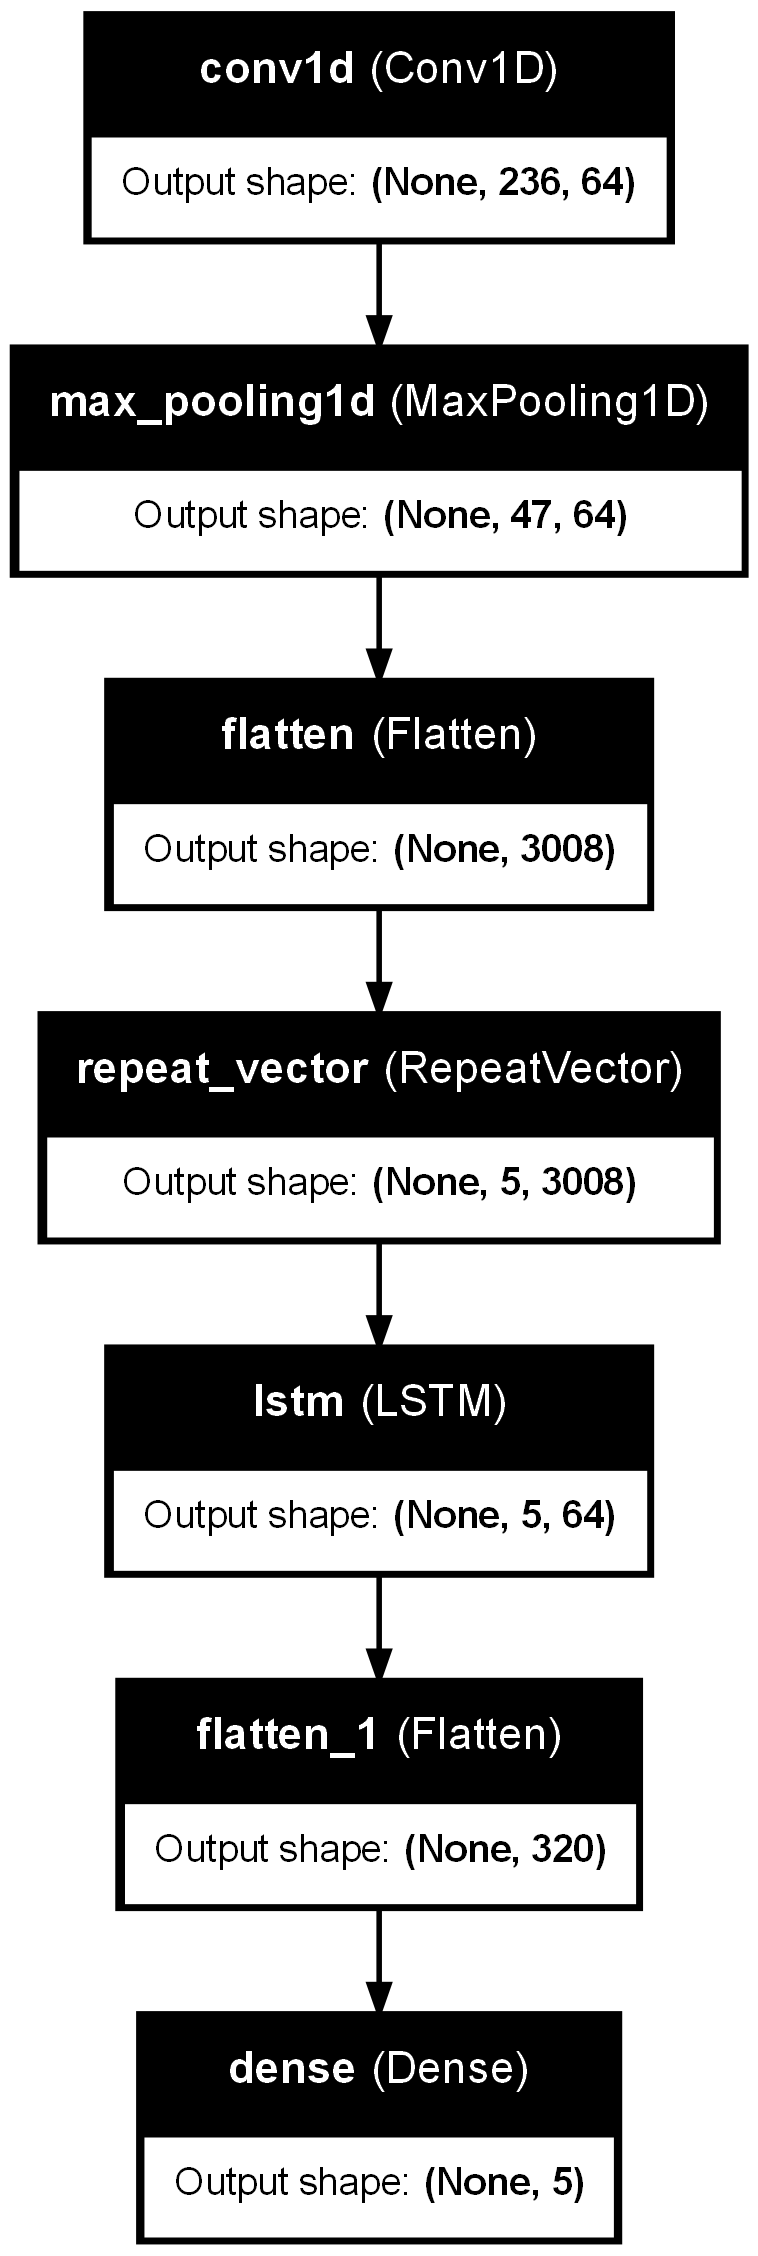

In [21]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Reshape training data to 2D array
X_train_2d = x_train.reshape(x_train.shape[0], -1)

# Train the classifier
xgb_classifier.fit(X_train_2d, y_train)

# Reshape test data to 2D array
X_test_2d = x_test.reshape(x_test.shape[0], -1)

# Make predictions
y_pred = xgb_classifier.predict(X_test_2d)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.516504854368932
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.64      0.59       105
           1       0.54      0.50      0.52        64
           2       0.51      0.34      0.41       119
           3       0.51      0.62      0.56       141
           4       0.48      0.47      0.47        86

    accuracy                           0.52       515
   macro avg       0.52      0.51      0.51       515
weighted avg       0.52      0.52      0.51       515



<Figure size 2000x1000 with 0 Axes>

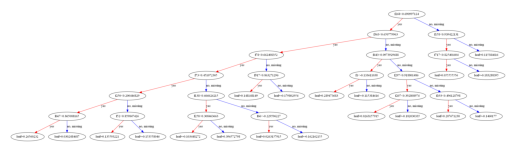

In [23]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(xgb_classifier)
plt.show()


The confusion matrix is:


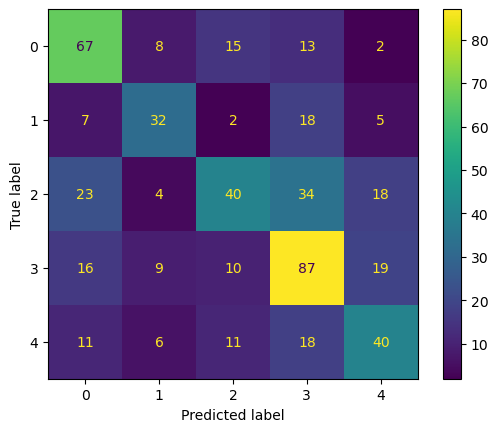

In [24]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)  
disp.plot()
plt.show()